In [257]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import iqr
import pandas as pd
import random

In [258]:
# Read in data
# data = pd.read_csv('labels_final.txt')
# data = pd.read_csv('labels.txt')
# data = pd.read_csv('labels_temp.txt')
# data = pd.read_csv('labels_skew.txt')
# data = pd.read_csv('labels_cropped.txt')
# data = pd.read_csv('labels_round3_2feat.txt')
# data = pd.read_csv('labels_round3_10pct.txt')
# data = pd.read_csv('labels_wavelet.txt')

# data = pd.read_csv('labels_round3_nocluster.txt')
data = pd.read_csv('labels_round3.txt')
# data = pd.read_csv('labels_cropped.txt')

len(data)

217

In [259]:
data = data[data.ClusterSize>=10]


In [260]:
# Remove duplicates
data = data.drop_duplicates(subset=data.columns[1:])
# data = data.dropna()
len(data)

174

In [261]:
# X = np.array([np.log(1./data.AvgLength),data.StdAngle]).T
X = np.array([data.AvgLength,data.StdAngle]).T

# # X = np.array([data.MedLength,data.Skew]).T
# # X = data.Avglength.as_matrix().reshape(-1,1)
y = data.Label.as_matrix()

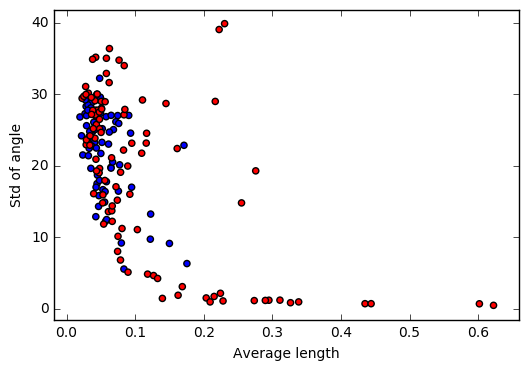

In [263]:
colors = ['r' if label else 'b' for label in y]

plt.scatter(X[:,0],X[:,1],c=colors)
plt.axis('equal')
plt.xlabel('Average length')
plt.ylabel('Std of angle')
# plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
plt.axis('tight')
plt.show()


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [265]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))



In [266]:
N = 100
acc = np.array([])
acc_clear = np.array([])
acc_noisy = np.array([])
dec_reg = np.zeros(np.c_[xx.ravel(), yy.ravel()].shape[0])
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #,random_state=0)

    # Logistic regression
#     clf = LogisticRegression()
#     clf.fit(X_train,y_train)

    # KNN
#     clf = KNeighborsClassifier(n_neighbors=10)
#     clf.fit(X_train,y_train)
    
#     Decision tree classification
    clf = tree.DecisionTreeClassifier(min_samples_split=2)
    clf.fit(X_train,y_train)

#     # Random Forest
#     clf = RandomForestClassifier(n_estimators=10,min_samples_split=2,random_state=0)
#     clf.fit(X_train,y_train)

    # Prediction
    y_pred = clf.predict(X)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Training and test accuracy
    train_err = float(sum(y_pred_train==y_train))/len(y_train)
    test_err = float(sum(y_pred_test==y_test))/len(y_test)
    acc = np.append(acc,test_err)
    
    ix_clear = np.where(X_test[:,0]>=0.1)
    ix_noisy = np.where(X_test[:,0]<0.1)
    acc_clear = np.append(acc_clear,float(sum(y_pred_test[ix_clear]==y_test[ix_clear]))/len(y_test[ix_clear]))
    acc_noisy = np.append(acc_noisy,float(sum(y_pred_test[ix_noisy]==y_test[ix_noisy]))/len(y_test[ix_noisy]))
    
    # Predict against real data 
#     y_pred_real = clf.predict(X_real)

#     # Training and test accuracy
#     accuracy = float(sum(y_pred_real==y_real))/len(y_real)
#     acc = np.append(acc,accuracy)
        
#     ix_clear = np.where(X_real[:,0]>=0.15)
#     ix_noisy = np.where(X_real[:,0]<0.15)
    
#     acc_clear = np.append(acc_clear,float(sum(y_pred_real[ix_clear]==y_real[ix_clear]))/len(y_real[ix_clear]))
#     acc_noisy = np.append(acc_noisy,float(sum(y_pred_real[ix_noisy]==y_real[ix_noisy]))/len(y_real[ix_noisy]))
    
    # Decision regions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    dec_reg = dec_reg + Z

dec_reg = dec_reg.reshape(xx.shape)/N
    
print np.mean(acc)
print np.mean(acc_clear)
print np.mean(acc_noisy)

0.611132075472
0.848301949684
0.544183252612


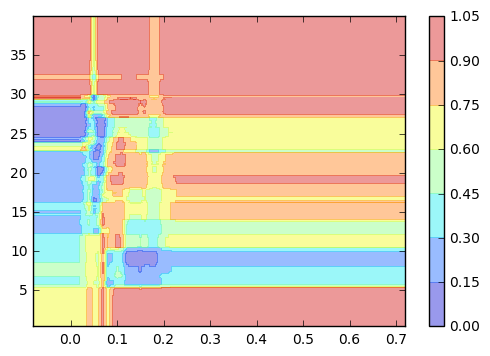

In [267]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plt.figure(figsize=(20,10))
plt.contourf(xx, yy, dec_reg, alpha=0.4)
# plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.colorbar()
plt.show()

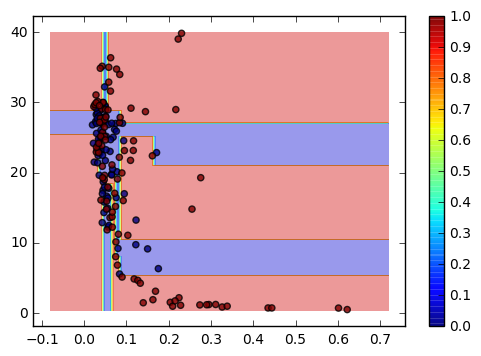

In [268]:
# Plot region with p > 0.5

Z_pos = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# ix_pos = np.where(Z_pos>0.5)[0]
Z_pos[Z_pos>0.5] = 1
Z_pos = Z_pos.reshape(xx.shape)

plt.contourf(xx, yy, Z_pos, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.colorbar()
plt.show()

In [269]:
# plt.contourf(xx, yy, dec_reg, alpha=0.4)
# plt.scatter(X_real[:, 0], X_real[:, 1], c=y_real, alpha=0.8)
# plt.colorbar()
# plt.show()

In [270]:
# percentage of real images with clear patterns that are detected

# ix_clear = np.where(X_real[:,0]<2.5)
ix_clear = np.where(X_real[:,0]>=0.15)
np.mean(acc_clear)*float(len(ix_clear[0]))/len(X_real)

0.12188246403510097

In [271]:
data[(data.AvgLength>=0.1) & (data.StdAngle<=5) & (data.Label==1) ].ImgID


110    132_nir_2016-09-02.png
111    134_nir_2014-07-01.png
112    135_nir_2011-08-13.png
113    138_nir_2012-06-28.png
117    151_nir_2016-06-21.png
125     18_nir_2015-08-14.png
128    194_nir_2013-08-11.png
134     20_nir_2009-07-23.png
140    229_nir_2014-09-06.png
148     24_nir_2012-07-11.png
165    322_nir_2013-08-11.png
170    341_nir_2016-07-17.png
171    342_nir_2016-08-03.png
172    343_nir_2016-08-03.png
174    345_nir_2016-08-03.png
175    346_nir_2016-08-09.png
176    347_nir_2016-08-09.png
182    353_nir_2016-08-09.png
183    355_nir_2016-08-09.png
194     45_nir_2015-08-14.png
195     46_nir_2014-07-10.png
Name: ImgID, dtype: object